In [347]:
import pandas as pd 
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression, SGDRegressor, RidgeClassifier, SGDClassifier
from sklearn.metrics import r2_score, accuracy_score, f1_score, recall_score, precision_score, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from lightgbm import LGBMRegressor, LGBMClassifier 

from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

import joblib

import random


In [186]:
def score_(y_true, y_pred): 
    a = recall_score(y_true, y_pred, zero_division=1)
    b = precision_score(y_true, y_pred, zero_division=1)
    c = f1_score(y_true, y_pred, zero_division=1)
    print(a, b, c)  

In [5]:
df = pd.read_csv("C:/e-commerce-leads/train_wn75k28.csv")
df_test = pd.read_csv("C:/e-commerce-leads/test_Wf7sxXF.csv")

In [148]:
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,6,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

(                 id  campaign_var_1  campaign_var_2  products_purchased  \
 count  39161.000000    39161.000000    39161.000000        18250.000000   
 mean   19581.000000        6.523812        6.452746            2.154137   
 std    11304.951283        3.472944        2.614296            0.779815   
 min        1.000000        1.000000        1.000000            1.000000   
 25%     9791.000000        4.000000        5.000000            2.000000   
 50%    19581.000000        6.000000        6.000000            2.000000   
 75%    29371.000000        9.000000        8.000000            3.000000   
 max    39161.000000       16.000000       15.000000            4.000000   
 
        user_activity_var_1  user_activity_var_2  user_activity_var_3  \
 count         39161.000000         39161.000000         39161.000000   
 mean              0.400092             0.006716             0.102832   
 std               0.509194             0.081676             0.303743   
 min               0.0

In [9]:
df_test.describe(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

(                 id  campaign_var_1  campaign_var_2  products_purchased  \
 count  13184.000000    13184.000000    13184.000000         5048.000000   
 mean   45753.500000        7.724439        7.943416            2.108954   
 std     3806.037309        3.599981        2.687832            0.783483   
 min    39162.000000        1.000000        1.000000            1.000000   
 25%    42457.750000        5.000000        6.000000            2.000000   
 50%    45753.500000        8.000000        8.000000            2.000000   
 75%    49049.250000       10.000000       10.000000            3.000000   
 max    52345.000000       16.000000       15.000000            4.000000   
 
        user_activity_var_1  user_activity_var_2  user_activity_var_3  \
 count         13184.000000         13184.000000         13184.000000   
 mean              0.386681             0.004248             0.103307   
 std               0.505653             0.065037             0.304371   
 min               0.0

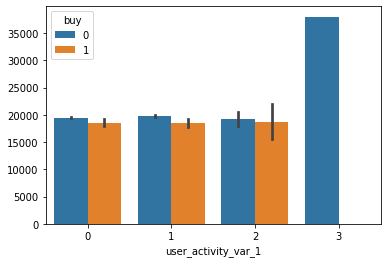

In [91]:
sns.barplot(df.user_activity_var_1, df.index, df.buy)

In [80]:
df.loc[df.products_purchased==1][df.buy==1]["id"].count(), df.loc[df.products_purchased==1][df.buy==0]["id"].count(),
df.loc[df.products_purchased==4][df.buy==1]["id"].count(), df.loc[df.products_purchased==4][df.buy==0]["id"].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(74, 642)

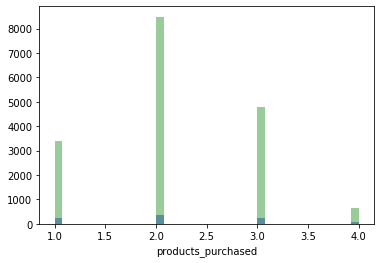

In [102]:
sns.distplot(df.loc[df.buy==1]['products_purchased'], kde = False, color ='blue', bins = 39)
sns.distplot(df.loc[df.buy==0]['products_purchased'], kde = False, color ='green', bins = 39)

In [56]:
df.products_purchased.value_counts()
df.groupby("products_purchased").buy.count()
df.pivot_table(index="products_purchased", values="buy")

,buy
products_purchased,
1.0,0.066429
2.0,0.043194
3.0,0.050557
4.0,0.103352


In [84]:
df.pivot_table(index="user_activity_var_1", values="buy"), df.user_activity_var_1.unique(), df.groupby("user_activity_var_1")["buy"].count()

(                          buy
 user_activity_var_1          
 0                    0.044283
 1                    0.059395
 2                    0.147059
 3                    0.000000,
 array([0, 1, 2, 3], dtype=int64),
 user_activity_var_1
 0    23869
 1    14917
 2      374
 3        1
 Name: buy, dtype: int64)

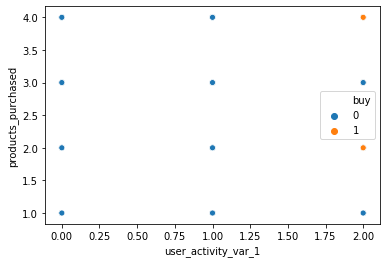

In [103]:
sns.scatterplot(data=df, x="user_activity_var_1", y="products_purchased", hue="buy")

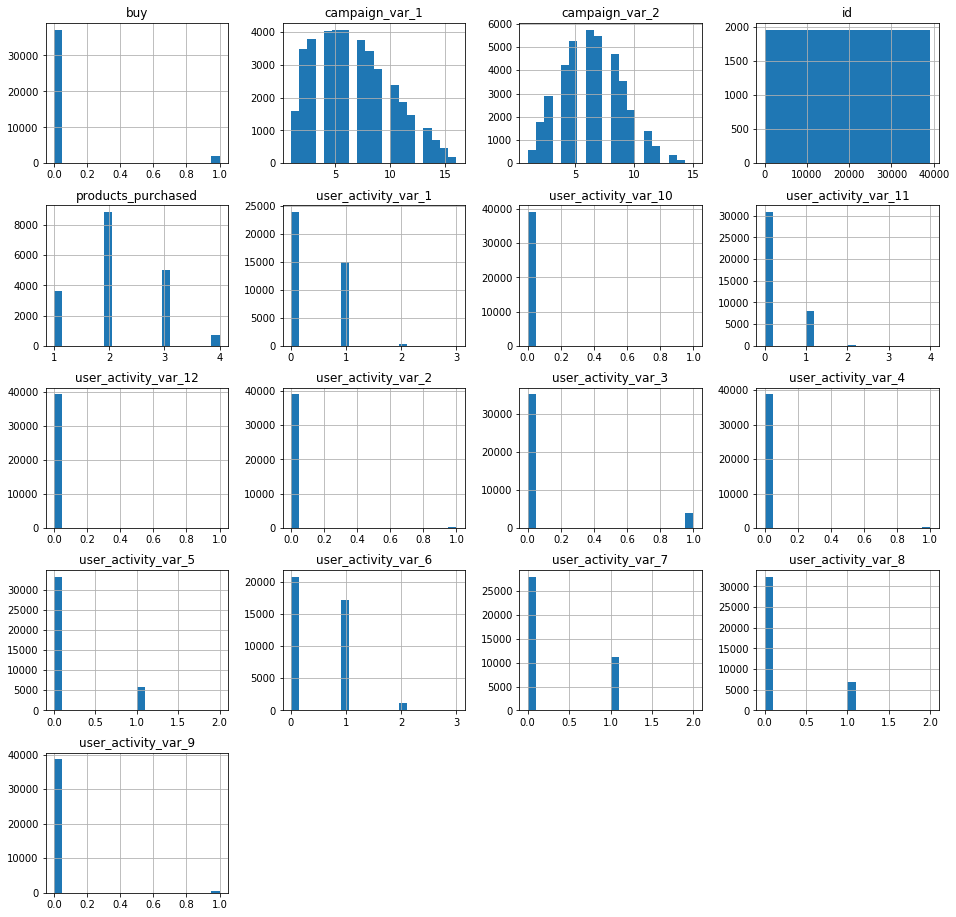

In [92]:
df.hist(bins = 20, figsize = (16, 16))
plt.show()

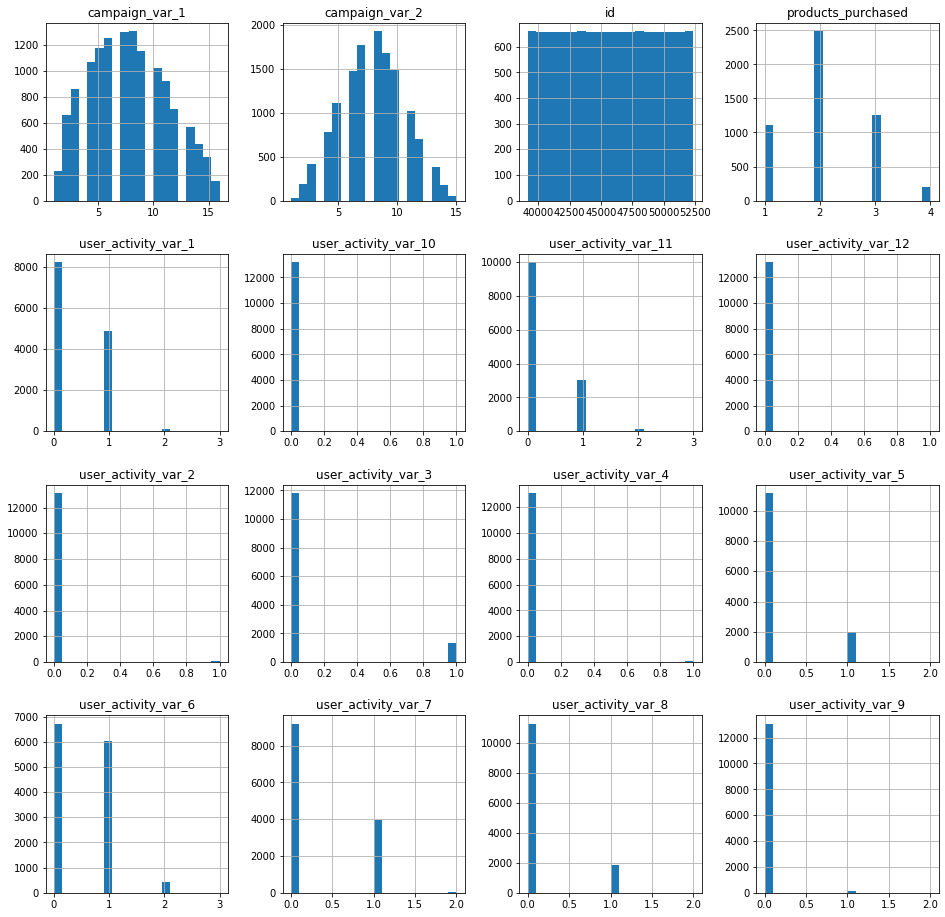

In [93]:
df_test.hist(bins = 20, figsize = (16, 16))
plt.show()

In [104]:
df.corr('pearson')

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.143723,0.222746,-0.027862,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,-0.020762
campaign_var_1,0.143723,1.000000,0.561489,-0.014415,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202
campaign_var_2,0.222746,0.561489,1.000000,0.021305,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064
products_purchased,-0.027862,-0.014415,0.021305,1.000000,-0.009479,0.011023,0.000775,0.010831,-0.007867,0.001855,0.008707,-0.005779,0.008816,0.004380,-0.003545,-0.007717,0.004140
user_activity_var_1,0.012223,0.024100,-0.032969,-0.009479,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.011023,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.000775,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.010831,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706
user_activity_var_5,-0.006575,-0.023116,-0.030990,-0.007867,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972
user_activity_var_6,0.013992,0.029665,0.067304,0.001855,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951


In [109]:
df.corr('spearman')

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.000000,0.142087,0.220371,-0.028400,0.012949,-0.011075,-0.000572,-0.015203,-0.006248,0.012393,0.016534,-0.035104,-0.019808,0.001002,0.024832,-0.009223,-0.020762
campaign_var_1,0.142087,1.000000,0.549940,-0.014833,0.023421,-0.034097,-0.013067,-0.032212,-0.023738,0.030240,-0.071672,-0.013999,-0.059322,-0.004128,-0.017583,-0.007973,-0.084778
campaign_var_2,0.220371,0.549940,1.000000,0.018652,-0.031713,-0.041438,-0.006243,-0.039196,-0.029180,0.065231,-0.053994,-0.031639,-0.060705,-0.010043,0.000089,-0.009819,-0.080723
products_purchased,-0.028400,-0.014833,0.018652,1.000000,-0.009012,0.007648,-0.000692,0.007785,-0.008822,0.000102,0.008238,-0.004797,0.005806,0.004009,-0.006361,-0.007513,-0.001133
user_activity_var_1,0.012949,0.023421,-0.031713,-0.009012,1.000000,0.012949,-0.025742,0.016672,-0.016439,-0.189671,-0.083998,-0.046627,0.033290,0.013434,-0.064994,0.002893,0.041093
user_activity_var_2,-0.011075,-0.034097,-0.041438,0.007648,0.012949,1.000000,-0.001075,0.132108,0.060555,-0.004721,-0.020096,-0.035314,0.155794,0.046324,0.073242,0.024440,0.354627
user_activity_var_3,-0.000572,-0.013067,-0.006243,-0.000692,-0.025742,-0.001075,1.000000,0.003023,0.023334,-0.050317,-0.006011,-0.025522,0.003898,0.019152,-0.028507,0.013261,0.005174
user_activity_var_4,-0.015203,-0.032212,-0.039196,0.007785,0.016672,0.132108,0.003023,1.000000,0.070581,-0.022081,-0.004330,-0.039376,0.204941,0.046924,0.056291,0.037937,0.394706
user_activity_var_5,-0.006248,-0.023738,-0.029180,-0.008822,-0.016439,0.060555,0.023334,0.070581,1.000000,-0.079678,-0.007619,-0.031366,0.071734,0.028164,0.013263,0.023083,0.161431
user_activity_var_6,0.012393,0.030240,0.065231,0.000102,-0.189671,-0.004721,-0.050317,-0.022081,-0.079678,1.000000,-0.169510,-0.062064,-0.013123,0.001855,-0.077975,0.002799,-0.010080


In [153]:
#"signup_date"
columns = ["created_at", "signup_date"]
df_ = df.drop(columns = columns).copy()

KeyError: "['created_at' 'signup_date'] not found in axis"

In [167]:
df_ = df_.dropna()
df_

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,3,4,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,39155,7,11,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0
39156,39157,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [182]:
muty = SelectKBest(score_func=mutual_info_classif, k=4)
muty.fit(df_.values[:,1:-1], df_.values[:, -1])
X_train_muty = muty.transform(df_.values[:,1:-1])
# X_test_fs = fs.transform(X_test)
muty.scores_, X_train_chi 

array([0.00499789, 0.00448672, 0.0028062 , 0.00341887, 0.01955995,
       0.        , 0.02228027, 0.01001522, 0.        , 0.00305711,
       0.00507729, 0.03964141, 0.00162563, 0.03143528, 0.00192347])

In [178]:
chi = SelectKBest(score_func=chi2, k=6)
chi.fit(df_.values[:,1:-1], df_.values[:, -1])
X_train_chi = chi.transform(df_.values[:,1:-1])
# X_test_chi = fs.transform(df_test)
chi.scores_

array([1.95376518e+02, 9.50061256e+01, 8.83003491e-02, 3.08764665e+01,
       2.25060651e+03, 3.91172203e-01, 2.60646217e+03, 3.89450672e+02,
       5.06456983e-02, 1.05901105e+01, 1.16515513e+02, 4.22896222e+03,
       1.81500525e+02, 1.06163638e+03, 1.30397694e+02])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_train_chi, df_.values[:, -1], test_size = 0.7)

0.4582089552238806 0.9777070063694268 0.6239837398373984


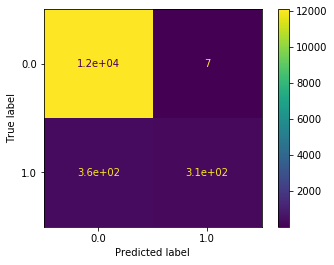

In [235]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score_(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test) 

In [211]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test) 
score_(y_test, y_pred_xgb)


0.5119402985074627 0.9689265536723164 0.669921875


0.5208955223880597 0.9587912087912088 0.6750483558994197


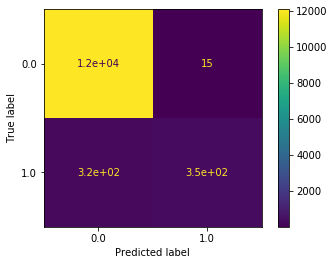

In [237]:
rfc_class = RandomForestClassifier(n_estimators = 1000, max_features= 'auto', criterion= 'entropy')
rfc_class.fit(X_train, y_train)
y_pred_class_rfc = rfc_class.predict(X_test)
score_(y_test, y_pred_class_rfc)
plot_confusion_matrix(rfc_class, X_test, y_test) 

In [287]:
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.005,
max_depth=1).fit(X_train, y_train)

y_test_class_gbc = gbc.predict(X_test)
Score(y_test, y_test_class_gbc)

0.4298507462686567 1.0 0.6012526096033403


0.6432835820895523 0.5762032085561497 0.6078984485190408


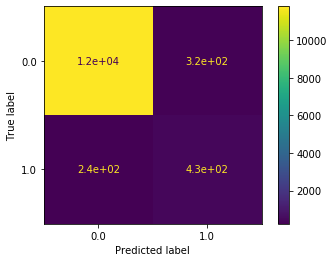

In [286]:
log_reg = LogisticRegression(multi_class='multinomial', C= 1, class_weight= {1: 0.9, 0: 0.1}, penalty= 'l2', solver= 'lbfgs').fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score_(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test) 

In [348]:
from tensorflow import keras
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense, Dropout, LSTM, Flatten, RepeatVector, Conv1D, MaxPool1D, MaxPooling1D, BatchNormalization
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers.experimental import preprocessing

tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [372]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [383]:
model1 = Sequential()
model1.add(Dense(units = 4, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 16, activation="relu")) 
#model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu"))
#model1.add(Dropout(0.1))
#model.add(Flatten())
model1.add(Dense(units = 1, activation="sigmoid"))

In [384]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer = optimizer, loss = keras.losses.BinaryCrossentropy(), metrics = METRICS)
model1.fit(X_train, y_train, epochs =16, batch_size = 15)

Train on 5475 samples
Epoch 1/16
5475/5475 [==============================] - 1s 273us/sample - loss: 0.2195 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5192.0000 - fn: 283.0000 - accuracy: 0.9483 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6349 - prc: 0.0962
Epoch 2/16
5475/5475 [==============================] - 0s 85us/sample - loss: 0.1977 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5192.0000 - fn: 283.0000 - accuracy: 0.9483 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6695 - prc: 0.1513
Epoch 3/16
5475/5475 [==============================] - 0s 79us/sample - loss: 0.1827 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 5192.0000 - fn: 283.0000 - accuracy: 0.9483 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7313 - prc: 0.2697
Epoch 4/16
5475/5475 [==============================] - 0s 79us/sample - loss: 0.1551 - tp: 32.0000 - fp: 0.0000e+00 - tn: 5192.0000 - fn: 251.0000 - accuracy: 0.9542 - precision: 1.0000 - recall: 0.1131 - auc: 0.8125 - prc: 0.4561
Epoch 5/16
5475/

In [389]:
predictions_roll1 = model1.predict(X_test) 
c = predictions_roll1.tolist()
c = [_[0] for _ in c]
c = [1 if _ > 0.20 else 0 for _ in c]
score_(y_test, c)

0.6 0.6291079812206573 0.6142093200916731
